In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
import re

# Setup
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Load processed CBE reviews
df = pd.read_csv('../data/processed/cbe_reviews.csv')
df['date'] = pd.to_datetime(df['date'])  # ensure datetime
df.head()


[nltk_data] Downloading package stopwords to /home/smuca/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,review,rating,date,bank,source
0,everytime you uninstall the app you have to re...,1,2025-06-04,Commercial Bank of Ethiopia,Google Play
1,Best Mobile Banking app ever,5,2025-06-04,Commercial Bank of Ethiopia,Google Play
2,it was good app but it have some issues like i...,2,2025-06-04,Commercial Bank of Ethiopia,Google Play
3,very niec,5,2025-06-04,Commercial Bank of Ethiopia,Google Play
4,best app of finance,5,2025-06-04,Commercial Bank of Ethiopia,Google Play


Total reviews: 360
Date range: 2025-03-20 to 2025-06-04
Average rating: 4.09


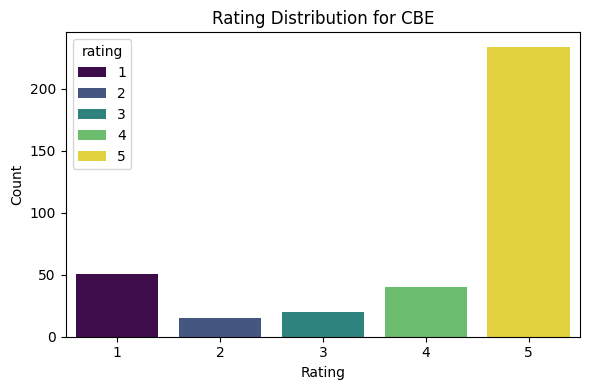

In [8]:
print("Total reviews:", len(df))
print("Date range:", df['date'].min().date(), "to", df['date'].max().date())
print("Average rating:", round(df['rating'].mean(), 2))

# Rating distribution
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='rating', palette='viridis', hue='rating')
plt.title('Rating Distribution for CBE')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


In [14]:
def get_top_ngrams(texts, n=10, ngram_range=(2, 2)):
    """Compute top n-grams from text series."""
    vectorizer = CountVectorizer(ngram_range=ngram_range, stop_words='english', max_features=200)
    X = vectorizer.fit_transform(texts.dropna())
    feature_names = vectorizer.get_feature_names_out()
    counts = X.sum(axis=0).A1
    ngrams = sorted(zip(feature_names, counts), key=lambda x: x[1], reverse=True)[:n]
    return ngrams
top_trigrams = get_top_ngrams(df['review'], n=10, ngram_range=(3, 3))

print('\nTop 10 N-grams for Commercial Bank of Ethiopia:')
for term, count in top_trigrams:
    print(f'{term}: {count}')


Top 10 N-grams for Commercial Bank of Ethiopia:
mobile banking app: 7
best mobile banking: 2
cbe mobile banking: 2
good easy use: 2
mobile banking apps: 2
prevents taking screenshots: 2
turn developer options: 2
update able screenshot: 2
update prevents taking: 2
15 second appear: 1


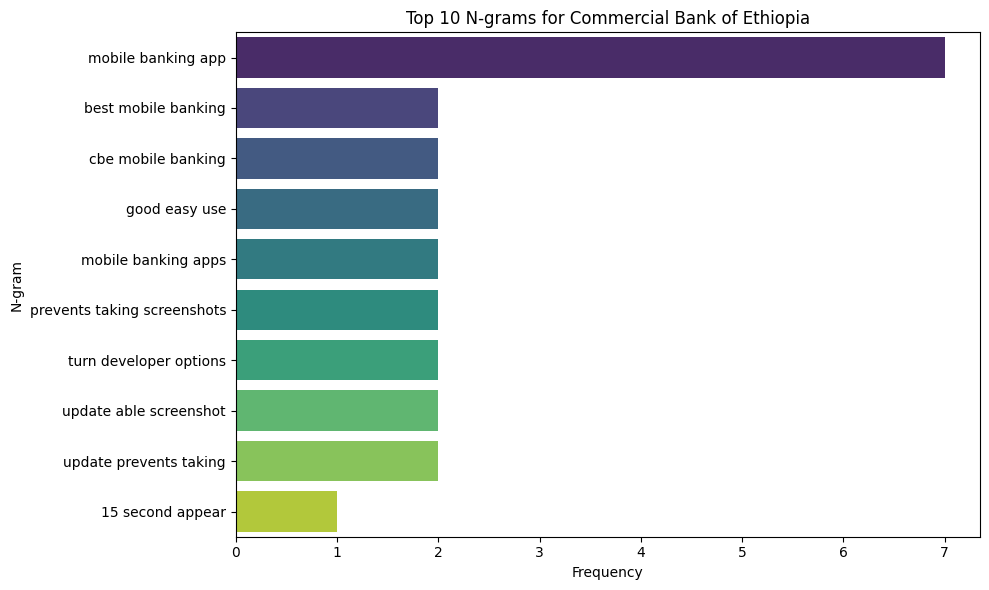

In [16]:
terms, counts = zip(*top_trigrams)
plt.figure(figsize=(10, 6))
sns.barplot(x=counts, y=terms, palette='viridis', hue=terms)
plt.title('Top 10 N-grams for Commercial Bank of Ethiopia')
plt.xlabel('Frequency')
plt.ylabel('N-gram')
plt.tight_layout()
plt.show()

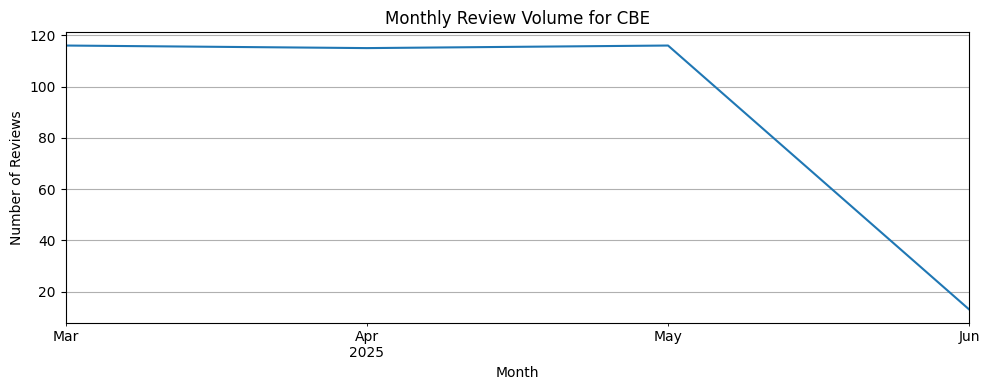

In [11]:
# Reviews per month
df_monthly = df.resample('ME', on='date').size()

plt.figure(figsize=(10,4))
df_monthly.plot()
plt.title('Monthly Review Volume for CBE')
plt.xlabel('Month')
plt.ylabel('Number of Reviews')
plt.grid(True)
plt.tight_layout()
plt.show()


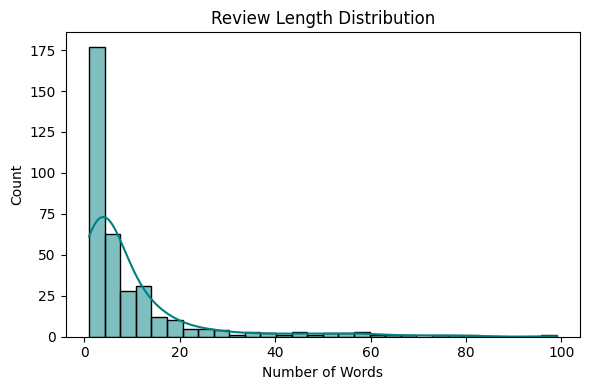

In [12]:
df['review_length'] = df['review'].apply(lambda x: len(str(x).split()))

# Review length distribution
plt.figure(figsize=(6,4))
sns.histplot(df['review_length'], bins=30, kde=True, color='teal')
plt.title('Review Length Distribution')
plt.xlabel('Number of Words')
plt.tight_layout()
plt.show()


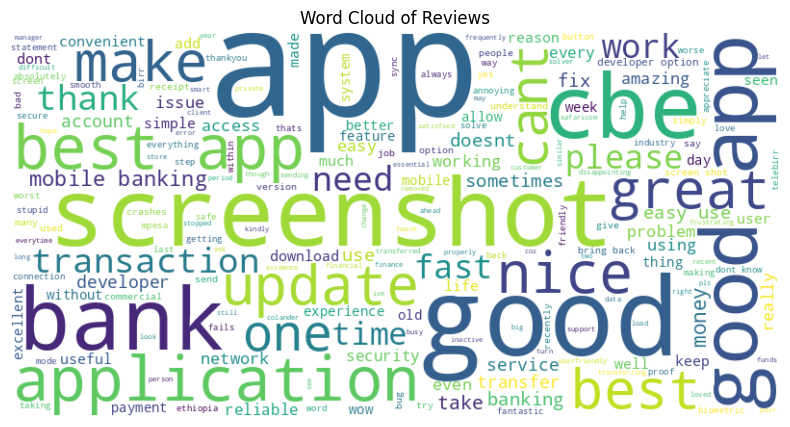

In [13]:
def preprocess_text(text):
    text = re.sub(r'[^A-Za-z\s]', '', str(text).lower())  # remove non-letters
    tokens = text.split()
    tokens = [w for w in tokens if w not in stop_words and len(w) > 2]
    return ' '.join(tokens)

all_text = ' '.join(df['review'].dropna().map(preprocess_text))

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Reviews')
plt.show()
